In [11]:
import cv2
import time
import numpy as np

protoFile = "hand/pose_deploy.prototxt"
weightsFile = "hand/pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [12]:
frame = cv2.imread("./ra2.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight
threshold = 0.1

t = time.time()
# input image dimensions for the network
inHeight = 368
# inWidth = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
print("time taken by network : {:.3f}".format(time.time() - t))

time taken by network : 4.243


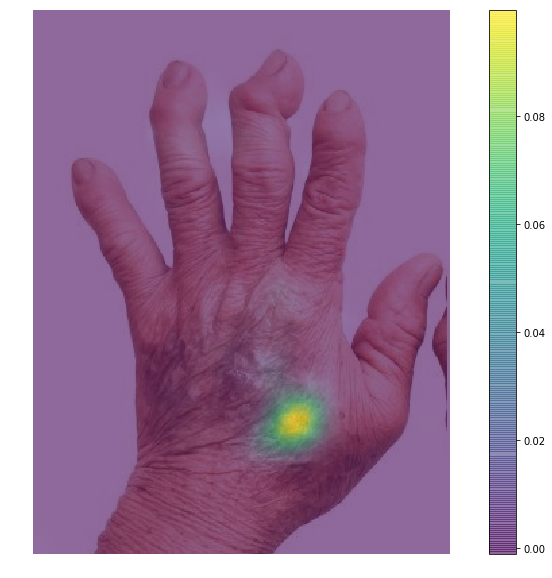

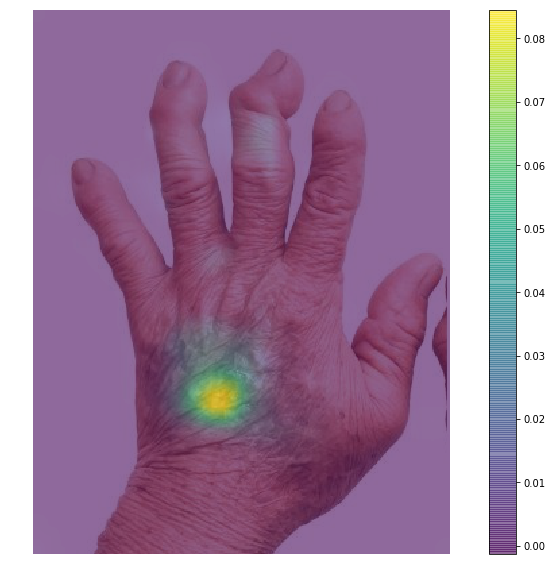

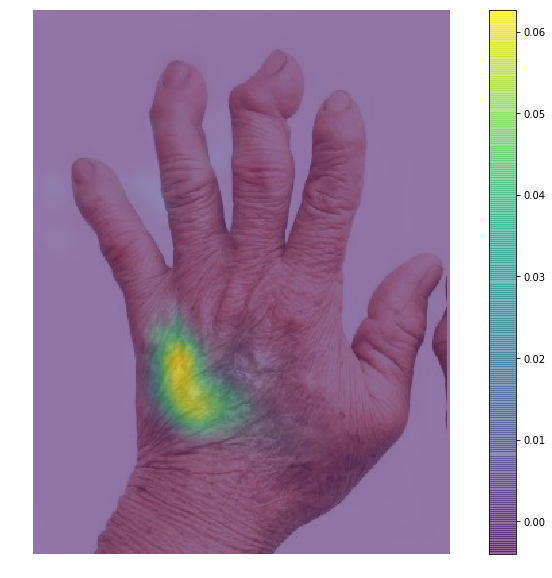

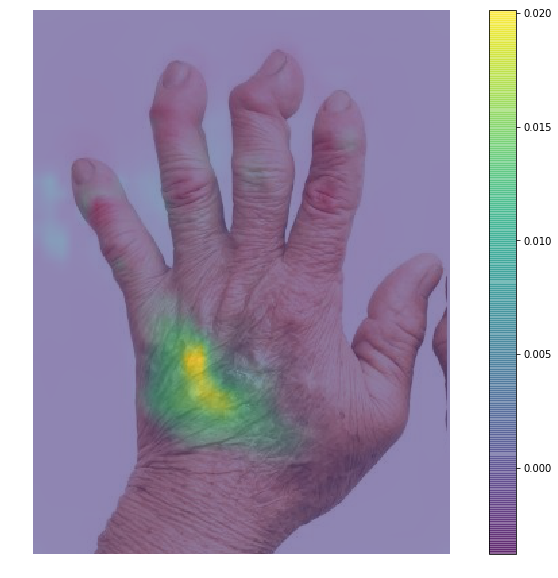

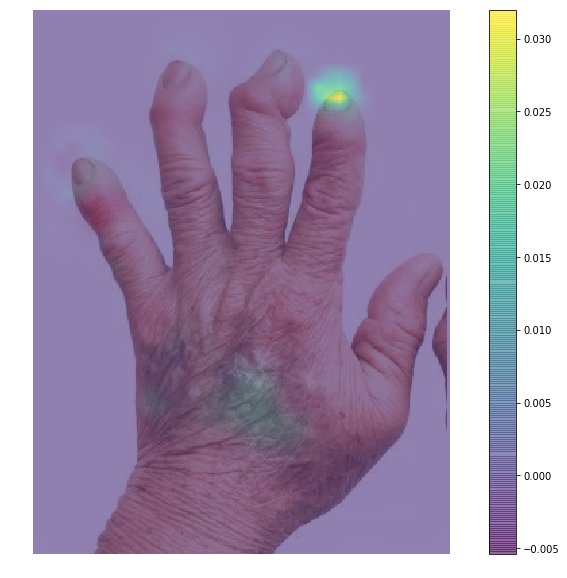

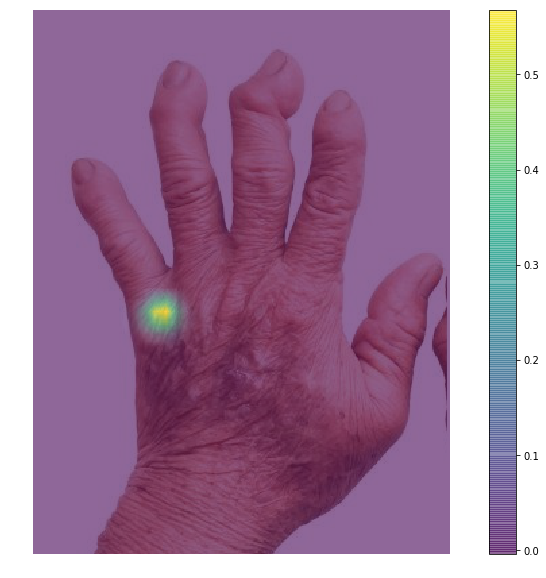

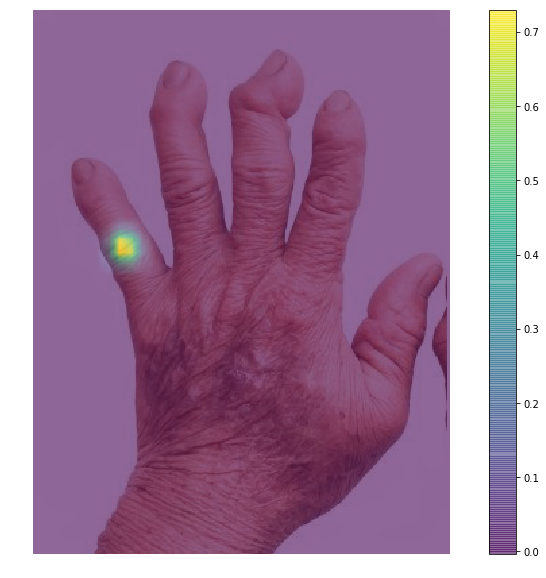

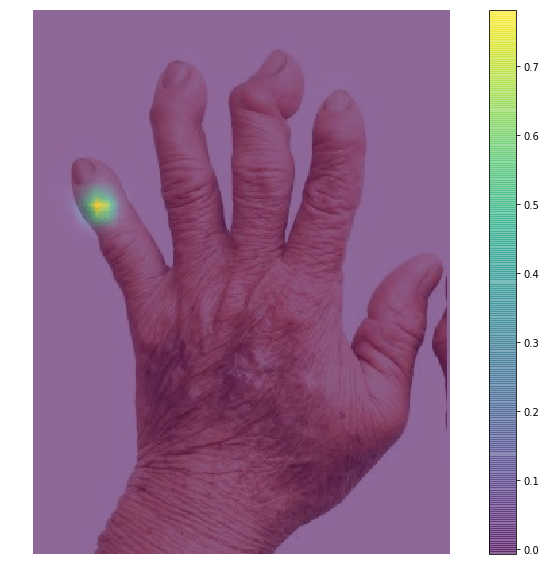

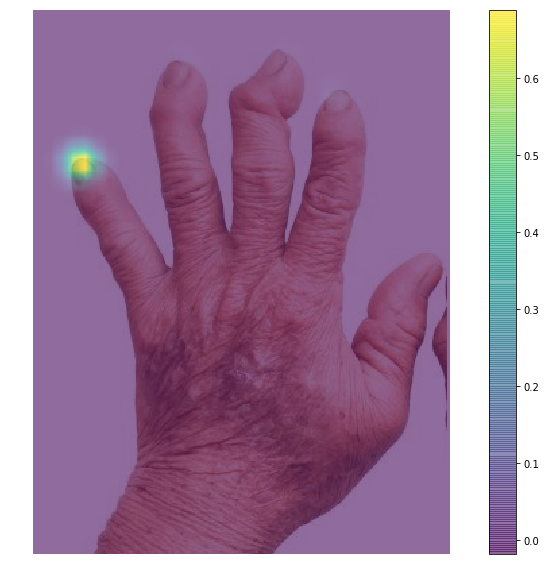

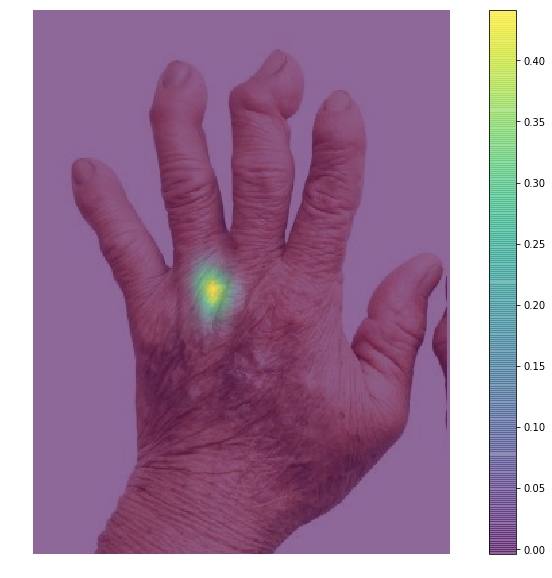

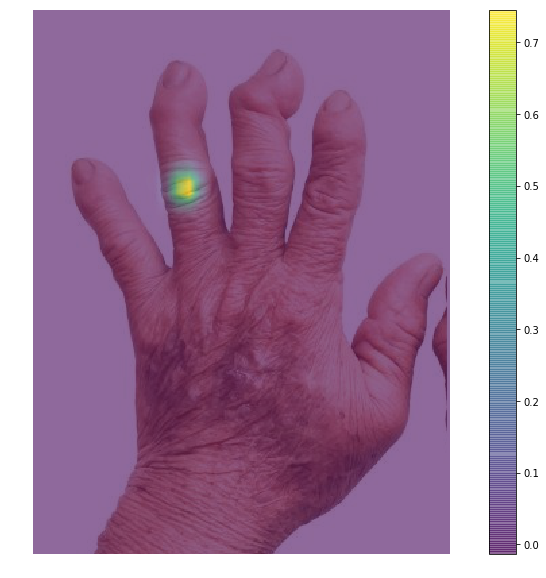

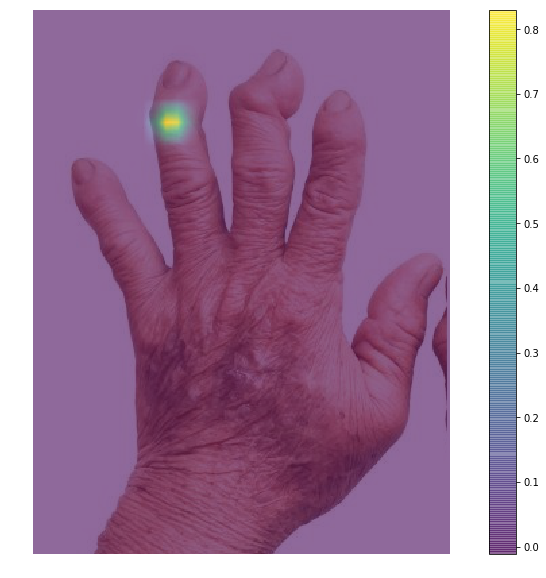

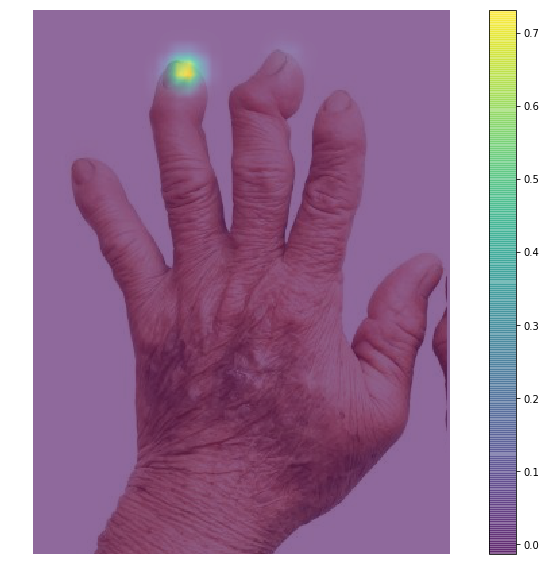

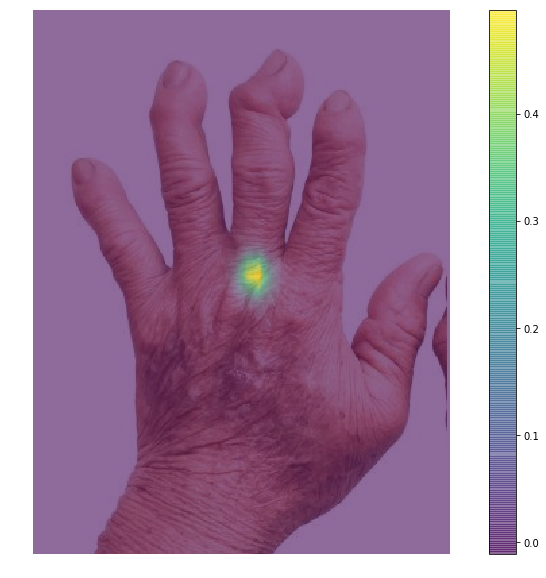

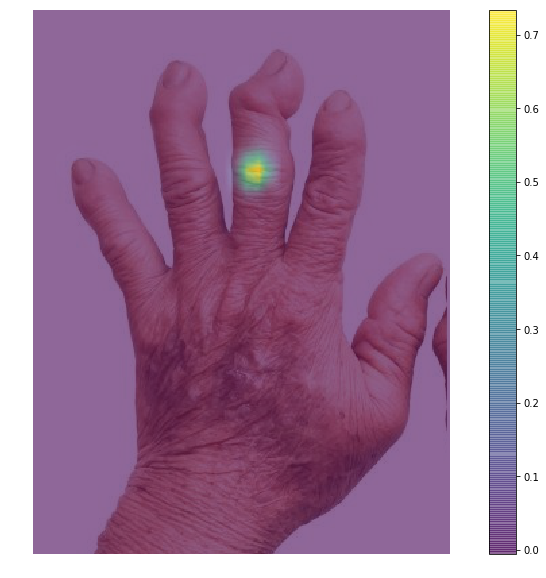

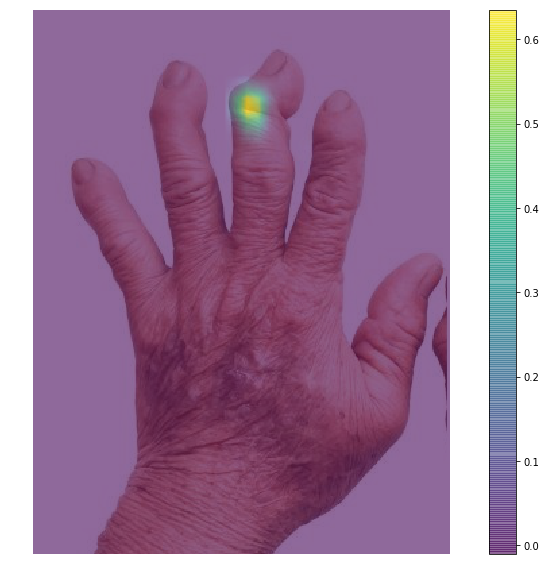

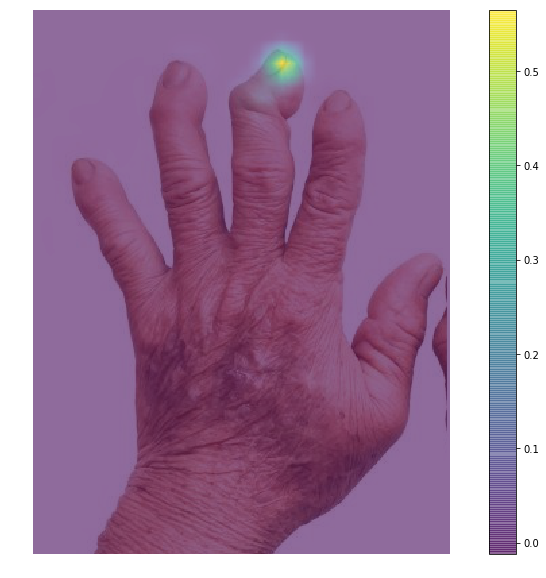

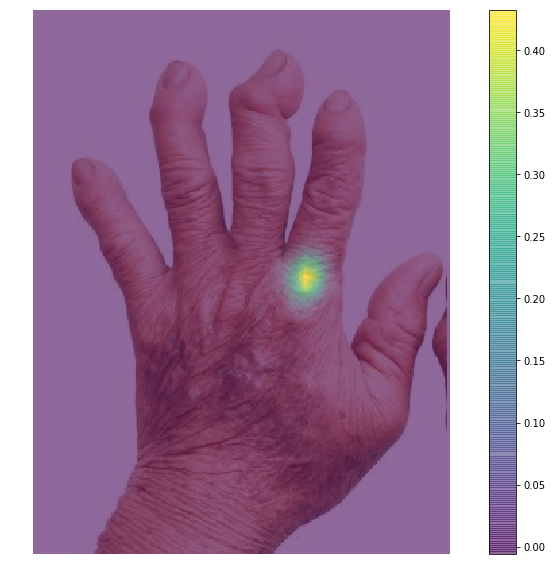

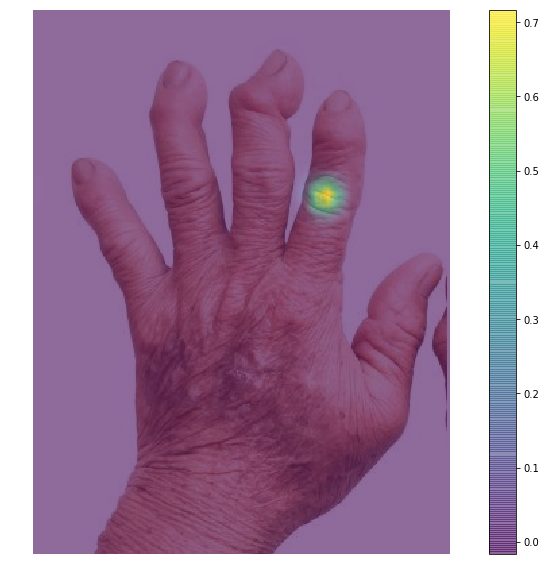

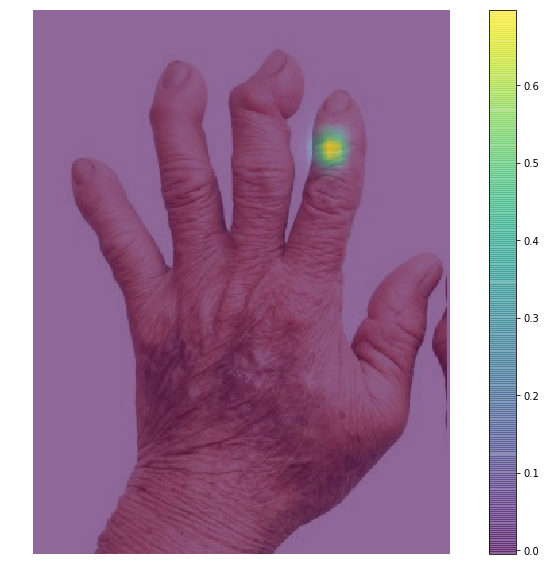

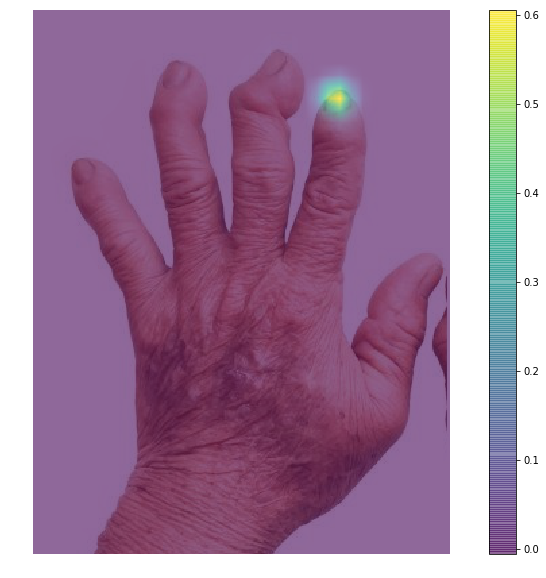

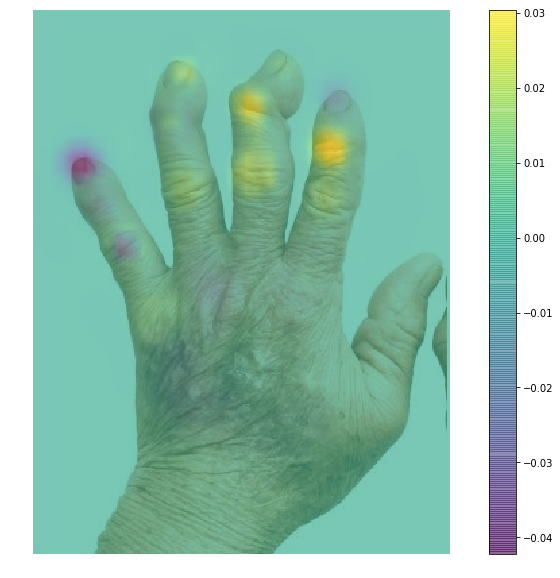

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(22):
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frame.shape[1], frame.shape[0]))
    plt.figure(figsize=[14,10])
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.imshow(probMap, alpha=0.6)
    plt.colorbar()
    plt.axis("off")

part A  (98, 223)  part B  (64, 179)
part A  5  part B  6
part A  (64, 179)  part B  (47, 144)
part A  6  part B  7
part A  (47, 144)  part B  (38, 117)
part A  7  part B  8
part A  (133, 206)  part B  (115, 135)
part A  9  part B  10
part A  (115, 135)  part B  (99, 83)
part A  10  part B  11
part A  (99, 83)  part B  (115, 47)
part A  11  part B  12
part A  (167, 197)  part B  (167, 118)
part A  13  part B  14
part A  (167, 118)  part B  (159, 74)
part A  14  part B  15
part A  (159, 74)  part B  (184, 39)
part A  15  part B  16
part A  (201, 197)  part B  (218, 136)
part A  17  part B  18
part A  (218, 136)  part B  (219, 100)
part A  18  part B  19
part A  (219, 100)  part B  (227, 65)
part A  19  part B  20
Total time taken : 996.377


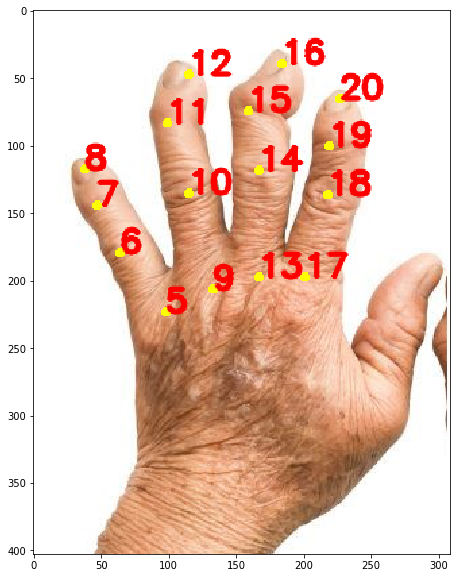

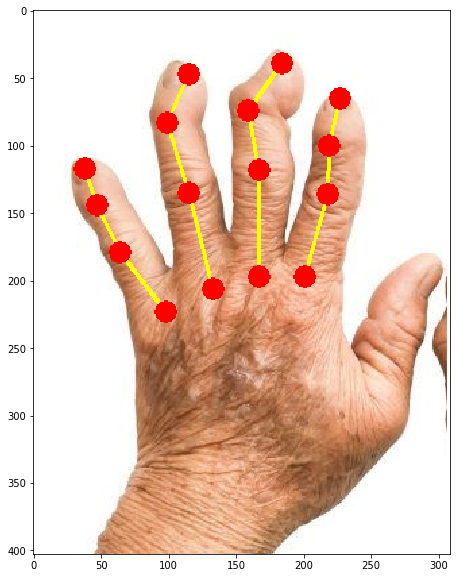

In [17]:
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        print('part A ', points[partA] , ' part B ' ,points[partB])
        print('part A ', partA , ' part B ' ,partB)
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)


plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


cv2.imwrite('Output-Keypoints.jpg', frameCopy)
cv2.imwrite('Output-Skeleton.jpg', frame)

print("Total time taken : {:.3f}".format(time.time() - t))

forward = 6.8218090534210205
Time Taken for frame = 6.833801507949829
total = 6.997590065002441
forward = 6.391074180603027
Time Taken for frame = 6.402067184448242
total = 6.420103549957275
forward = 6.296133995056152
Time Taken for frame = 6.312125205993652
total = 6.328113079071045
forward = 6.240167140960693
Time Taken for frame = 6.251159906387329
total = 6.262614727020264
forward = 6.097253322601318
Time Taken for frame = 6.109246015548706
total = 6.121673583984375
forward = 6.233171701431274
Time Taken for frame = 6.245163679122925
total = 6.248191595077515
forward = 5.990320682525635
Time Taken for frame = 6.002312898635864
total = 6.0153069496154785
forward = 5.938353061676025
Time Taken for frame = 5.950345039367676
total = 5.965341806411743
forward = 6.0163047313690186
Time Taken for frame = 6.029296636581421
total = 6.0302979946136475
forward = 5.950344562530518
Time Taken for frame = 5.964335918426514
total = 5.96933388710022
forward = 5.955342054367065
Time Taken for fram

KeyboardInterrupt: 